### This notebook includes fitting the pre-processed data from the Notebook01, applying SVM model and discussing the performance.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

#### Loading the pre-processed data from the Notebook01.

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

### Fitting a Linear Kernel model

In [9]:
# Initialize the model with a linear kernel
linear_classifier = SVC(kernel='linear', probability=True)
# Train the model
linear_classifier.fit(X_train, y_train)
# Make predictions
y_pred_linear = linear_classifier.predict(X_test)
y_pred_linear_proba = linear_classifier.predict_proba(X_test)[:, 1]
# Display the first few predictions
y_pred_linear[:10], y_pred_linear_proba[:10]

/Users/sunilinus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array(['no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no'],
       dtype=object),
 array([0.00334445, 0.54153249, 0.99999229, 0.90660575, 0.00396215,
        0.99999906, 0.97532983, 0.94921575, 0.02691583, 0.06876878]))

### Measuring the performance of Linear Kernel model

In [10]:
# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
# Classification Report
class_report_linear = classification_report(y_test, y_pred_linear)

print(f'Linear Kernel Accuracy: {accuracy_linear}')
print(f'Linear Kernel Confusion Matrix: \n{conf_matrix_linear}')
print(f'Linear Kernel Classification Report: \n{class_report_linear}')

Linear Kernel Accuracy: 0.931373158450923
Linear Kernel Confusion Matrix: 
[[7497  518]
 [ 586 7486]]
Linear Kernel Classification Report: 
              precision    recall  f1-score   support

          no       0.93      0.94      0.93      8015
         yes       0.94      0.93      0.93      8072

    accuracy                           0.93     16087
   macro avg       0.93      0.93      0.93     16087
weighted avg       0.93      0.93      0.93     16087



/var/folders/12/rnky8q5n4vnb_wvb9wbqcjgm0000gn/T/ipykernel_13972/2322203353.py:17: RuntimeWarning: divide by zero encountered in divide
  lift = cum_gains / baseline


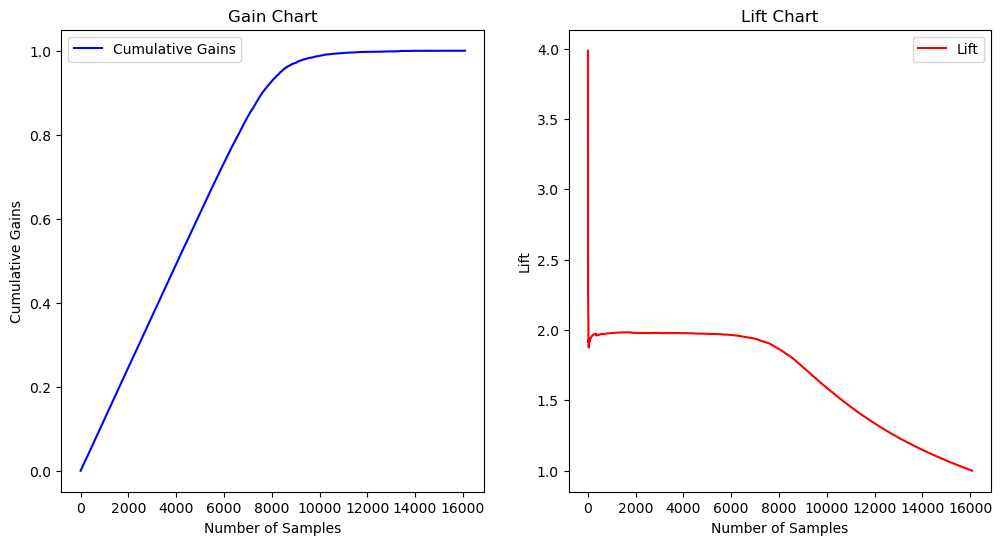

In [11]:
import matplotlib.pyplot as plt

# Function to plot Lift and Gain Charts
def plot_lift_gain_chart(y_true, y_pred_linear_proba):
    # Convert "yes" and "no" labels to binary labels (1 and 0)
    y_true_binary = y_true.replace({'yes': 1, 'no': 0}).values

    # Sort the probabilities and true labels in descending order
    sorted_indices = np.argsort(y_pred_linear_proba)[::-1]
    sorted_y_true = y_true_binary[sorted_indices]

    # Calculate the cumulative gains
    cum_gains = np.cumsum(sorted_y_true) / np.sum(sorted_y_true)

    # Calculate the lift values correctly
    baseline = np.linspace(0, 1, len(y_true))
    lift = cum_gains / baseline

    # Plot the Lift and Gain Charts
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cum_gains, label='Cumulative Gains', color='b')
    plt.xlabel('Number of Samples')
    plt.ylabel('Cumulative Gains')
    plt.title('Gain Chart')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(lift, label='Lift', color='r')
    plt.xlabel('Number of Samples')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.legend()
    plt.show()

# Plot the Lift and Gain Charts
plot_lift_gain_chart(y_test, y_pred_linear_proba)

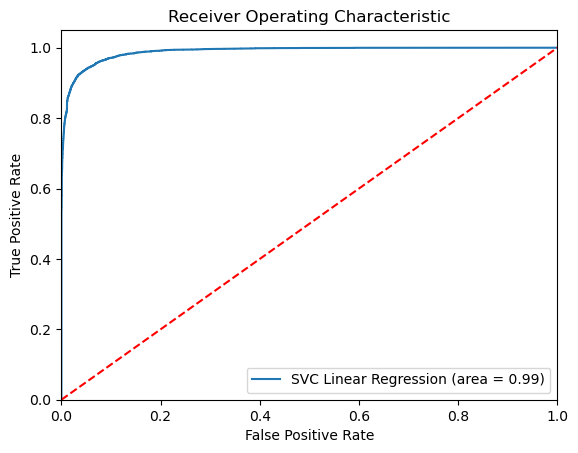

AUC Score:  0.9888987725566594


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert 'yes' and 'no' labels to binary labels (1 and 0)
y_test_binary = y_test.replace({'yes': 1, 'no': 0}).values

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_linear_proba)

# Now, you can plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='SVC Linear Regression (area = %0.2f)' % roc_auc_score(y_test_binary, y_pred_linear_proba))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculating AUC
auc = roc_auc_score(y_test_binary, y_pred_linear_proba)
print("AUC Score: ", auc)

### Fitting a Non-Linear Kernel (RBF) model

In [14]:
# Initialize the model with an RBF kernel
rbf_classifier = SVC(kernel='rbf', probability=True)
# Train the model
rbf_classifier.fit(X_train, y_train)
# Make predictions
y_pred_rbf = rbf_classifier.predict(X_test)
y_pred_rbf_proba = rbf_classifier.predict_proba(X_test)[:, 1]
# Display the first few predictions
y_pred_linear[:10], y_pred_rbf_proba[:10]

/Users/sunilinus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array(['no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no'],
       dtype=object),
 array([0.00456625, 0.66155389, 1.        , 0.92599766, 0.00210516,
        0.99999999, 0.95943715, 0.99999962, 0.02497862, 0.06135048]))

### Measuring the performance of Non-Linear Kernel model

In [15]:
# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Classification Report
class_report_rbf = classification_report(y_test, y_pred_rbf)

print(f'RBF Kernel Accuracy: {accuracy_rbf}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_rbf}')
print(f'RBF Kernel Classification Report: \n{class_report_rbf}')

RBF Kernel Accuracy: 0.9444893392180022
RBF Kernel Confusion Matrix: 
[[7606  409]
 [ 484 7588]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

          no       0.94      0.95      0.94      8015
         yes       0.95      0.94      0.94      8072

    accuracy                           0.94     16087
   macro avg       0.94      0.94      0.94     16087
weighted avg       0.94      0.94      0.94     16087



/var/folders/12/rnky8q5n4vnb_wvb9wbqcjgm0000gn/T/ipykernel_13972/1805511946.py:17: RuntimeWarning: divide by zero encountered in divide
  lift = cum_gains / baseline


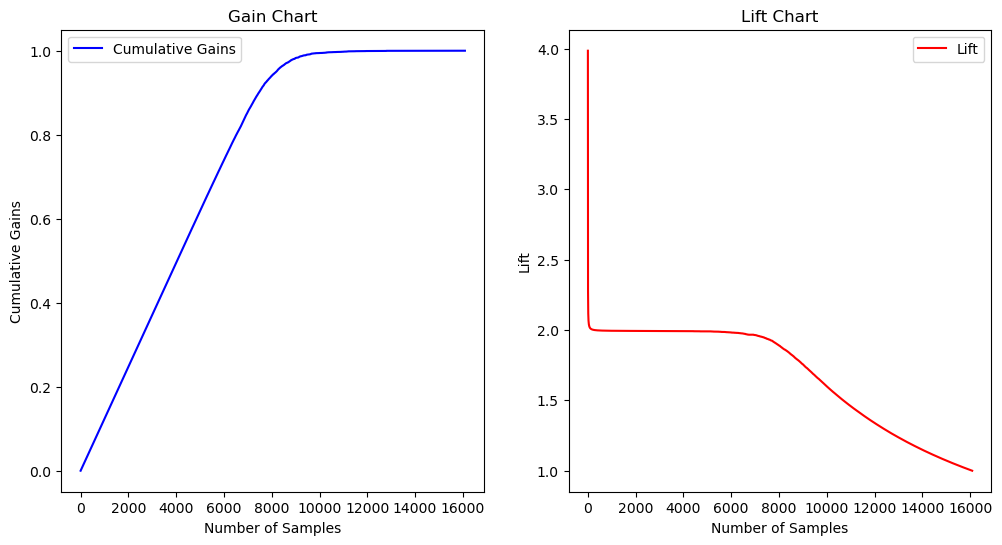

In [16]:
import matplotlib.pyplot as plt

# Function to plot Lift and Gain Charts
def plot_lift_gain_chart(y_true, y_pred_rbf_proba):
    # Convert "yes" and "no" labels to binary labels (1 and 0)
    y_true_binary = y_true.replace({'yes': 1, 'no': 0}).values

    # Sort the probabilities and true labels in descending order
    sorted_indices = np.argsort(y_pred_rbf_proba)[::-1]
    sorted_y_true = y_true_binary[sorted_indices]

    # Calculate the cumulative gains
    cum_gains = np.cumsum(sorted_y_true) / np.sum(sorted_y_true)

    # Calculate the lift values correctly
    baseline = np.linspace(0, 1, len(y_true))
    lift = cum_gains / baseline

    # Plot the Lift and Gain Charts
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cum_gains, label='Cumulative Gains', color='b')
    plt.xlabel('Number of Samples')
    plt.ylabel('Cumulative Gains')
    plt.title('Gain Chart')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(lift, label='Lift', color='r')
    plt.xlabel('Number of Samples')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.legend()
    plt.show()

# Plot the Lift and Gain Charts
plot_lift_gain_chart(y_test, y_pred_rbf_proba)

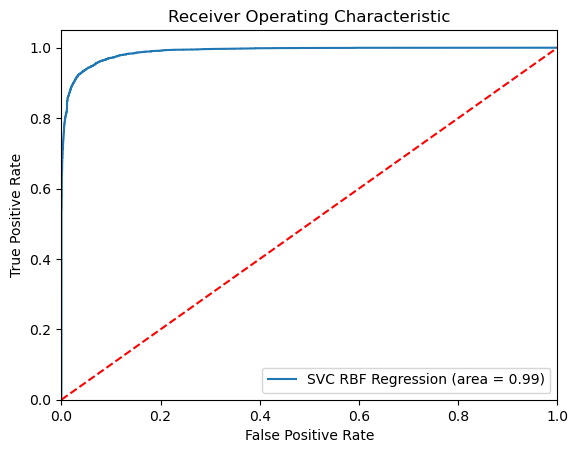

AUC Score:  0.9888988034699557


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert 'yes' and 'no' labels to binary labels (1 and 0)
y_test_binary = y_test.replace({'yes': 1, 'no': 0}).values

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_rbf_proba)

# Now, you can plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='SVC RBF Regression (area = %0.2f)' % roc_auc_score(y_test_binary, y_pred_rbf_proba))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculating AUC
auc = roc_auc_score(y_test_binary, y_pred_rbf_proba)
print("AUC Score: ", auc)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Linear Kernel model
linear_classifier = SVC(kernel='linear', probability=True)

# Define the hyperparameter grid for Randomized Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 1000, 10000],  # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Create the Randomized Search CV object
random_search_linear = RandomizedSearchCV(
    linear_classifier, 
    param_distributions=param_grid, 
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',  # You can use different scoring metrics
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Show progress during the search
)

# Fit the Randomized Search on the training data
random_search_linear.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_linear = random_search_linear.best_params_
best_model_linear = random_search_linear.best_estimator_

# Evaluate the best model on the test data
y_pred_best_linear = best_model_linear.predict(X_test)
accuracy_best_linear = accuracy_score(y_test, y_pred_best_linear)

print(f'Best Hyperparameters (Linear Kernel - Random Search): {best_params_linear}')
print(f'Best Model Accuracy (Linear Kernel - Random Search): {accuracy_best_linear}')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the RBF Kernel model
rbf_classifier = SVC(kernel='rbf', probability=True)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'max_iter': [100, 1000, 10000],  # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Create the Grid Search CV object
grid_search_rbf = GridSearchCV(
    rbf_classifier, 
    param_grid=param_grid,
    scoring='accuracy',  # You can use different scoring metrics
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Show progress during the search
)

# Fit the Grid Search on the training data
grid_search_rbf.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_rbf = grid_search_rbf.best_params_
best_model_rbf = grid_search_rbf.best_estimator_

# Evaluate the best model on the test data
y_pred_best_rbf = best_model_rbf.predict(X_test)
accuracy_best_rbf = accuracy_score(y_test, y_pred_best_rbf)

print(f'Best Hyperparameters (RBF Kernel - Grid Search): {best_params_rbf}')
print(f'Best Model Accuracy (RBF Kernel - Grid Search): {accuracy_best_rbf}')